# COVID-19 Dataset Analysis
## RNN: LSTM을 이용한 COVID-19 감염 예측


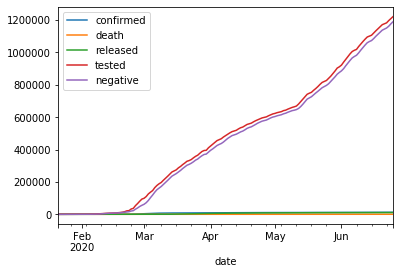

In [153]:
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.model_selection import train_test_split


from numpy import array


df = pd.read_csv("kr_daily.csv")
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df = df.set_index('date')

df.plot()

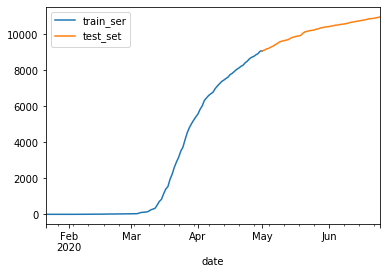

In [156]:
split_date = pd.Timestamp('2020-05-01')

train_set = df.loc[:split_date, ['released']]
test_set = df.loc[split_date:, ['released']]

ax = train_set.plot()
test_set.plot(ax=ax)
plt.legend(['train_ser', 'test_set'])

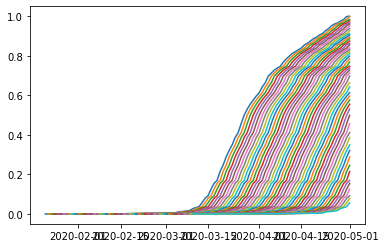

In [194]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train_set)
test_sc = sc.fit_transform(test_set)

train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train_set.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test_set.index)

for s in range(1, 50):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

plt.plot(train_sc_df)
plt.show()

In [193]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values


X_train_t = X_train.reshape(X_train.shape[0], 50, 1)
X_test_t = X_test.reshape(X_test.shape[0], 50, 1)

ValueError: cannot reshape array of size 2597 into shape (53,50,1)

In [183]:

from tensorflow.python.keras.layers import Input, Dense, LSTM
from tensorflow.python.keras.models import Sequential
from keras.layers import Embedding
import keras.backend as K 
from keras.callbacks import EarlyStopping 

K.clear_session() 
model = Sequential() # Sequeatial Model

model.add(LSTM(6, input_shape=(158, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 


model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 192       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [185]:
early_stop = EarlyStopping(monitor='loss', patience=7, verbose=1)

model.fit(X_train_t, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/100


OverflowError: cannot convert float infinity to integer

In [159]:
y_pred = model.predict(X_test_t)
print(y_pred)

[[0.01707402]
 [0.02073619]
 [0.02450905]
 [0.02824492]
 [0.0319047 ]
 [0.03512301]
 [0.03764817]
 [0.03993585]
 [0.04220127]
 [0.04447621]
 [0.04671045]
 [0.04891475]
 [0.05092841]
 [0.05283374]
 [0.05459862]
 [0.05633795]
 [0.05811827]
 [0.05996773]
 [0.06183752]
 [0.06371321]
 [0.06556682]
 [0.06743954]
 [0.06937832]
 [0.07133914]
 [0.0733743 ]
 [0.07545142]
 [0.07744585]
 [0.07936613]
 [0.0812012 ]
 [0.08306803]]


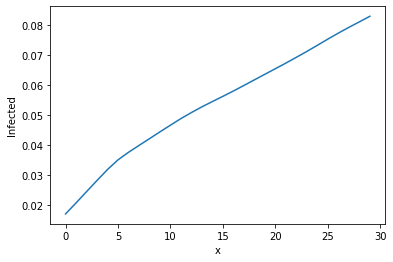

In [160]:
plt.figure()
plt.plot(y_pred)
plt.plot(y_test)

plt.xlabel("x")
plt.ylabel("Infected")
plt.show()

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

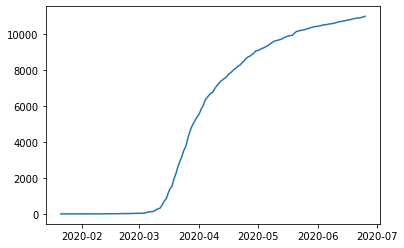

In [124]:
plt.plot(df['released'])
plt.plot(MinMaxScaler(y_pred).inverse_transform(1))